In [91]:
import pandas as pd

# 데이터 파일 읽어오는 방법
NO = pd.read_csv('data/No.csv')

In [92]:
NO = NO.loc[NO["Entity"] == "World", ['Year', 'Total including LUCF']]
print(NO)

      Year  Total including LUCF
6030  1990          2.368970e+09
6031  1991          2.356090e+09
6032  1992          2.348920e+09
6033  1993          2.332620e+09
6034  1994          2.424100e+09
6035  1995          2.479910e+09
6036  1996          2.493520e+09
6037  1997          2.480570e+09
6038  1998          2.510940e+09
6039  1999          2.498220e+09
6040  2000          2.490420e+09
6041  2001          2.512180e+09
6042  2002          2.570020e+09
6043  2003          2.604750e+09
6044  2004          2.687850e+09
6045  2005          2.701330e+09
6046  2006          2.733120e+09
6047  2007          2.802950e+09
6048  2008          2.775360e+09
6049  2009          2.769550e+09
6050  2010          2.845370e+09
6051  2011          2.914600e+09
6052  2012          2.937790e+09
6053  2013          2.918250e+09
6054  2014          2.963010e+09
6055  2015          2.995510e+09
6056  2016          3.027260e+09
6057  2017          3.087400e+09
6058  2018          3.072530e+09
6059  2019

In [93]:
# year을 index로 받기
# NO.set_index('Year', drop=True, inplace=True)
NO.reset_index(drop=True, inplace=True)

# rename하기
NO.rename(columns = {'Total including LUCF' : "NO"}, inplace=True)
print(NO)

    Year            NO
0   1990  2.368970e+09
1   1991  2.356090e+09
2   1992  2.348920e+09
3   1993  2.332620e+09
4   1994  2.424100e+09
5   1995  2.479910e+09
6   1996  2.493520e+09
7   1997  2.480570e+09
8   1998  2.510940e+09
9   1999  2.498220e+09
10  2000  2.490420e+09
11  2001  2.512180e+09
12  2002  2.570020e+09
13  2003  2.604750e+09
14  2004  2.687850e+09
15  2005  2.701330e+09
16  2006  2.733120e+09
17  2007  2.802950e+09
18  2008  2.775360e+09
19  2009  2.769550e+09
20  2010  2.845370e+09
21  2011  2.914600e+09
22  2012  2.937790e+09
23  2013  2.918250e+09
24  2014  2.963010e+09
25  2015  2.995510e+09
26  2016  3.027260e+09
27  2017  3.087400e+09
28  2018  3.072530e+09
29  2019  3.096790e+09


<Figure size 7000x500 with 0 Axes>

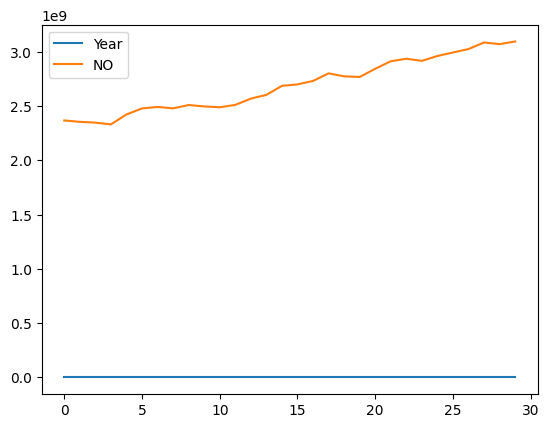

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize = (70, 5))
NO.plot()
plt.show()

In [101]:
# 데이터 머신러닝하기
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression

x = NO[['Year']]
y = NO['NO'].values
print(len(x), len(y))


32 32


In [102]:
lr = LinearRegression(fit_intercept=True)
lr.fit(x,y)

LinearRegression()

In [103]:
print('절편 :', lr.intercept_)
print('회귀 계수 :', lr.coef_)


절편 : -53107357995.12119
회귀 계수 : [27837709.16252435]


In [104]:
import numpy as np
# 전년도 까지 데이터 확보
X_test = np.array([[2020], [2021]])

result = list(lr.predict(X_test))
print(result)

[3180489931.5030365, 3208327640.665558, 3236165349.828087, 3264003058.990608, 3291840768.1531296, 3319678477.3156586, 3347516186.47818, 3375353895.640709, 3403191604.8032303, 3431029313.9657516, 3458867023.1282806, 3486704732.290802, 3514542441.453331, 3542380150.6158524, 3570217859.7783737, 3598055568.9409027, 3625893278.103424, 3653730987.2659454, 3681568696.4284744, 3709406405.590996, 3737244114.753525, 3765081823.916046, 3792919533.0785675, 3820757242.2410965, 3848594951.403618, 3876432660.566147, 3904270369.728668, 3932108078.8911896, 3959945788.0537186]


In [ ]:
import numpy as np


# 2050년도 까지 데이터 확보
X_test = np.array([[i] for i in range(2022, 2051)])
result = list(lr.predict(X_test))
print(result)

In [99]:
for i in range(2022 - 2020):
    NO.loc[len(NO)] = [int(X_test[i][0]), result[i]]

In [105]:
for i in range(2051-2022):
    NO.loc[len(NO)] = [int(X_test[i][0]), result[i]]

In [106]:
print(NO)

      Year            NO
0   1990.0  2.368970e+09
1   1991.0  2.356090e+09
2   1992.0  2.348920e+09
3   1993.0  2.332620e+09
4   1994.0  2.424100e+09
..     ...           ...
56  2046.0  3.848595e+09
57  2047.0  3.876433e+09
58  2048.0  3.904270e+09
59  2049.0  3.932108e+09
60  2050.0  3.959946e+09

[61 rows x 2 columns]


In [73]:
NO.set_index('Year', drop=True, inplace=True)

In [107]:
NO.to_csv("NO_2050.csv")